In [10]:
import gym
from collections import defaultdict, deque
import numpy as np
import matplotlib.pyplot as plt

In [11]:
env = gym.make('Taxi-v3')

In [12]:
env.action_space

Discrete(6)

In [13]:
env.observation_space

Discrete(500)

In [14]:
env.nA, env.nS

(6, 500)

In [15]:
def epsilon_greedy_policy(env, Q_s, episode, epsilon=None):
    
    if epsilon is None:
        epsilon = 1.0 / episode
    policy = np.ones(env.nA) * epsilon / env.nA
    policy[np.argmax(Q_s)] = 1 - epsilon + (epsilon / env.nA)
    
    return policy

In [16]:
state = env.reset()
env.render()
Q = defaultdict(lambda: np.zeros(env.nA))
policy = epsilon_greedy_policy(env, Q[state], 1)
        
while True:
    #action = np.random.choice(np.arange(env.nA), p=policy)
      
    action = np.argmax(Q[state])
    
    next_state, reward, done, info = env.step(action)
            
    state = next_state
            
    env.render()
            
    if done:
        env.render()
        break
                

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:

In [17]:
def q_learning(env):
    
    Q = defaultdict(lambda: np.zeros(env.nA))
    alpha = 0.1
    gamma = 1.0
    num_of_episodes = 20000
    scores = deque(maxlen=num_of_episodes)
    
    for eps in range(1, num_of_episodes+1):
        
        score = 0.0
        state = env.reset()
        
        while True:
            
            policy = epsilon_greedy_policy(env, Q[state], eps)
            
            action = np.random.choice(np.arange(env.nA), p=policy)
            
            next_state, reward, done, info = env.step(action)
            
            Q[state][action] += alpha*(reward + gamma * (np.max(Q[next_state])) - Q[state][action])
            
            score += reward
            
            state = next_state
            
            if done:
                scores.append(score)
                break
        
        if eps % 1000 == 0:
            print("Average reward", np.mean(score))
            #env.render()
                
    plt.plot(scores)
    plt.show()
    
    return Q
    

Average reward 6.0
Average reward 10.0
Average reward 8.0
Average reward 10.0
Average reward 10.0
Average reward 9.0
Average reward 10.0
Average reward 9.0
Average reward 4.0
Average reward 5.0
Average reward 6.0
Average reward 11.0
Average reward 4.0
Average reward 11.0
Average reward 12.0
Average reward 5.0
Average reward 8.0
Average reward 10.0
Average reward 7.0
Average reward 7.0


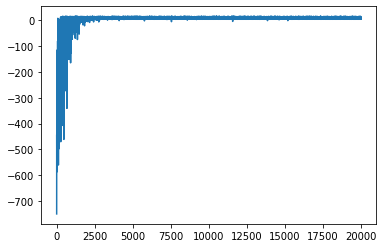

In [18]:
Q = q_learning(env)

In [19]:
state = env.reset()
env.render()
policy = epsilon_greedy_policy(env, Q[state], 1)
        
while True:
    #action = np.random.choice(np.arange(env.nA), p=policy)
      
    action = np.argmax(Q[state])
    
    next_state, reward, done, info = env.step(action)
            
    state = next_state
            
    env.render()
            
    if done:
        env.render()
        break
                
        
       

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: 

In [21]:
env = gym.make('FrozenLake8x8-v0')

In [22]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0
Average reward 0.0


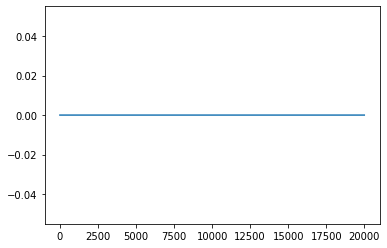

In [24]:
Q = q_learning(env)

In [25]:
state = env.reset()
env.render()
policy = epsilon_greedy_policy(env, Q[state], 1)
        
while True:
    #action = np.random.choice(np.arange(env.nA), p=policy)
      
    action = np.argmax(Q[state])
    
    next_state, reward, done, info = env.step(action)
            
    state = next_state
            
    env.render()
            
    if done:
        env.render()
        break
                


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF


  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
F

In [28]:
Q = defaultdict(lambda: np.zeros(env.nA))

policy = epsilon_greedy_policy(env, Q[state], 1)
            
action = np.random.choice(np.arange(env.nA), p=policy)
            
next_state, reward, done, info = env.step(action)

In [29]:
action

3

In [30]:
next_state

0

In [31]:
policy

array([0.25, 0.25, 0.25, 0.25])

In [32]:
action = np.random.choice(np.arange(env.nA), p=policy)
            
next_state, reward, done, info = env.step(action)

In [33]:
action

0

In [34]:
next_state

0